In [1]:
# Author: Mitchell D. Lobbes

# Standard imports
import pandas as pd
import numpy as np

# Plotting imports
import matplotlib.pyplot as plt

# Sklearn imports
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb

# Imputation imports
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [2]:
# Set Viewing Options
pd.set_option('display.width', 5000)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

In [3]:
data = pd.read_csv("../../../Data/Model/Model_data_cleaned.csv") 
data

,rental_price,GLA,n_res_benefits,population,d_school,d_transfer,d_mainstreet,n_business,n_earners,d_supermarket,avg_income,%_single_family_homes,k20_high_income,households_with_children,single_households,household_size,k40_low_income,WOZ,n_owner_occupied,urbanity_score,supermarket_1km,k0_k15,k15_k25,k25_k45,k45_k65,k65+
0,145.000000,800.0,960.0,5710,0.3,1.8,1.6,965.0,4500.0,0.4,26.9,22.0,15.5,245,3385,1.3,51.8,253.0,24.0,1.0,8.3,255,2155,1830,840,620
1,113.000000,1000.0,390.0,2160,0.2,1.0,0.6,220.0,1700.0,0.4,26.5,2.0,16.2,165,1050,1.4,43.0,229.0,33.0,1.0,3.0,155,525,940,345,190
2,145.428980,1049.0,640.0,5975,0.3,2.9,1.2,550.0,5000.0,0.5,24.9,14.0,15.6,385,2855,1.4,50.7,226.0,30.0,1.0,4.7,455,2275,2110,745,380
3,195.647807,2280.0,640.0,5975,0.3,2.9,1.2,550.0,5000.0,0.5,24.9,14.0,15.6,385,2855,1.4,50.7,226.0,30.0,1.0,4.7,455,2275,2110,745,380
4,105.000000,1400.0,0.0,650,NaN,NaN,NaN,200.0,NaN,0.4,NaN,0.0,NaN,70,175,1.8,NaN,321.0,47.0,2.0,NaN,70,60,265,165,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,127.000000,1400.0,0.0,4410,NaN,NaN,NaN,395.0,NaN,0.6,NaN,66.0,NaN,820,435,2.6,NaN,334.0,66.0,3.0,NaN,1095,425,1395,1025,465
297,120.000000,833.0,780.0,3000,0.9,16.3,0.8,210.0,2400.0,0.4,25.9,95.0,15.2,485,400,2.2,38.9,239.0,71.0,4.0,1.0,510,315,740,820,620
298,170.000000,2045.0,1280.0,7095,0.7,16.2,1.6,550.0,5600.0,0.8,29.6,77.0,22.4,1215,860,2.4,33.2,299.0,72.0,3.0,0.8,1295,795,1965,2185,860
299,123.000000,1674.0,0.0,1875,NaN,NaN,NaN,270.0,NaN,0.5,NaN,43.0,NaN,150,560,1.7,NaN,238.0,47.0,3.0,NaN,150,170,435,445,685


In [4]:
X = data.drop(columns=["rental_price"], axis=1).copy()
y = data["rental_price"].copy()

imputer = IterativeImputer(random_state=42)
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [5]:
def evaluate(model, test_features, test_labels):

    # calculate RMSE
    mse = mean_squared_error(test_labels, model.predict(test_features))
    rmse = np.sqrt(mse)
    print('RMSE: %.3f' % rmse)
    
    # calculate R^2
    r2 = r2_score(test_labels, model.predict(test_features))
    print('R^2: %.3f' % r2)

    # calculate mae
    mae = np.mean(abs(model.predict(test_features) - test_labels))
    print('MAE: %.3f' % mae)

    # calculate mape
    mape = np.mean(abs(model.predict(test_features) - test_labels) / test_labels)
    print('MAPE: %.3f' % mape)

    # calculate accuracy
    accuracy = 1 - mape
    print('Accuracy: %.3f' % accuracy)

In [6]:
reg_xgb = xgb.XGBRegressor(objective='reg:squarederror', missing=np.nan, seed=42)
reg_xgb.fit(X_train, y_train)
evaluate(reg_xgb, X_test, y_test)

RMSE: 35.298
R^2: -0.181
MAE: 25.954
MAPE: 0.178
Accuracy: 0.822


In [7]:
from sklearn.model_selection import RandomizedSearchCV

random_grid = {
 'n_estimators': [10,20, 50,100,200,300,400,500],
 "learning_rate" : [0.05,0.10,0.15,0.20,0.25,0.30],
 "max_depth" : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma": [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ],
 "reg_alpha": [0, 0.5, 1, 5],
 "reg_lambda": [0, 0.5, 1, 5]
}

In [8]:
xgbr = xgb.XGBRegressor(objective='reg:squarederror', missing=np.nan, seed=42)
xgbr_random = RandomizedSearchCV(estimator = xgbr, param_distributions = random_grid, n_iter = 30, cv = 10, verbose=2, random_state=42, n_jobs = -1)
xgbr_random.fit(X_train, y_train)

Fitting 10 folds for each of 30 candidates, totalling 300 fits
[CV] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.3, max_depth=12, min_child_weight=1, n_estimators=400, reg_alpha=0.5, reg_lambda=1; total time=   0.8s
[CV] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.3, max_depth=12, min_child_weight=1, n_estimators=400, reg_alpha=0.5, reg_lambda=1; total time=   0.8s
[CV] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.3, max_depth=12, min_child_weight=1, n_estimators=400, reg_alpha=0.5, reg_lambda=1; total time=   0.8s
[CV] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.3, max_depth=12, min_child_weight=1, n_estimators=400, reg_alpha=0.5, reg_lambda=1; total time=   0.8s
[CV] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.3, max_depth=12, min_child_weight=1, n_estimators=400, reg_alpha=0.5, reg_lambda=1; total time=   0.8s
[CV] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.3, max_depth=12, min_child_weight=1, n_estimators=400, reg_alpha=0.5, reg_

RandomizedSearchCV(cv=10,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate...
                                          predictor=None, random_state=None, ...),
                   n_iter=30, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7],
                                        'n_estimators': [10, 20, 50, 100, 200,
                                                         300, 400, 500],
                                        'reg_alpha': [0, 0.5, 1, 5],
                                        'reg_lambda': [0, 0.5, 1, 5]},
                   random_state=42, verbose=2)

In [9]:
reg_xgb = xgb.XGBRegressor(objective='reg:squarederror', missing=np.nan, seed=42, **xgbr_random.best_params_)
reg_xgb.fit(X_train, y_train)
evaluate(reg_xgb, X_test, y_test)
print(xgbr_random.best_params_)

RMSE: 36.201
R^2: -0.242
MAE: 25.868
MAPE: 0.174
Accuracy: 0.826
{'reg_lambda': 0.5, 'reg_alpha': 0.5, 'n_estimators': 50, 'min_child_weight': 5, 'max_depth': 10, 'learning_rate': 0.1, 'gamma': 0.0, 'colsample_bytree': 0.5}


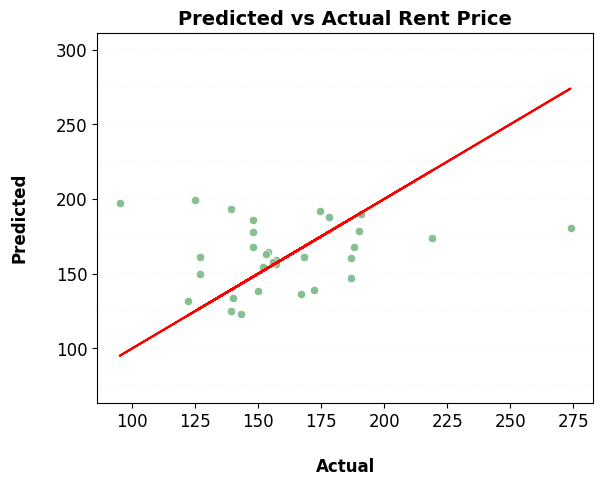

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.ticker import StrMethodFormatter

ax = sns.scatterplot(x=y_test, y=reg_xgb.predict(X_test), color = '#86bf91')

ax.plot(y_test, y_test, color="red")

# Remove title
ax.set_title("Predicted vs Actual Rent Price", weight='bold', size=14)
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)

# Set x-axis label
ax.set_xlabel("Actual", labelpad=20, weight='bold', size=12)

# Set y-axis label
ax.set_ylabel("Predicted", labelpad=20, weight='bold', size=12)

# Format y-axis label
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

#set background to white
ax.set_facecolor('white')

# set bottom spin to black thin line
ax.spines['bottom'].set_visible(True)
ax.spines['bottom'].set_color('black')
ax.spines['bottom'].set_linewidth(0.8)

# Draw horizontal axis lines behind bars
vals = ax.get_yticks()
for tick in vals:
        
        ax.axhline(y=tick, linestyle='dashed', alpha=0.1, color='#eeeeee', zorder=1)


# XAI with SHAP

In [11]:
import seaborn as sns
import shap

shap.initjs()

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [12]:
# create dataframe with 3 columns: y_pred, y_test, and absolute error
df = pd.DataFrame({'y_pred': reg_xgb.predict(X_test), 'y_test': y_test, 'abs_error': abs(reg_xgb.predict(X_test) - y_test)})

# reset index
df.reset_index(inplace=True, drop=True)

# sort dataframe by absolute error
df.sort_values(by=['abs_error'], ascending=False, inplace=True)

df

,y_pred,y_test,abs_error
29,197.677963,95.000000,102.677963
18,180.849030,274.000000,93.150970
6,199.269073,125.000000,74.269073
10,193.274277,139.000000,54.274277
11,173.596329,219.000000,45.403671
20,146.937958,186.838214,39.900256
24,186.217712,148.000000,38.217712
2,160.932922,127.000000,33.932922
12,138.909424,172.000000,33.090576
7,136.389099,167.000000,30.610901


In [13]:
#explainer = shap.TreeExplainer(regressor_rf)
explainer = shap.TreeExplainer(reg_xgb)
shap_values = explainer(X_test)

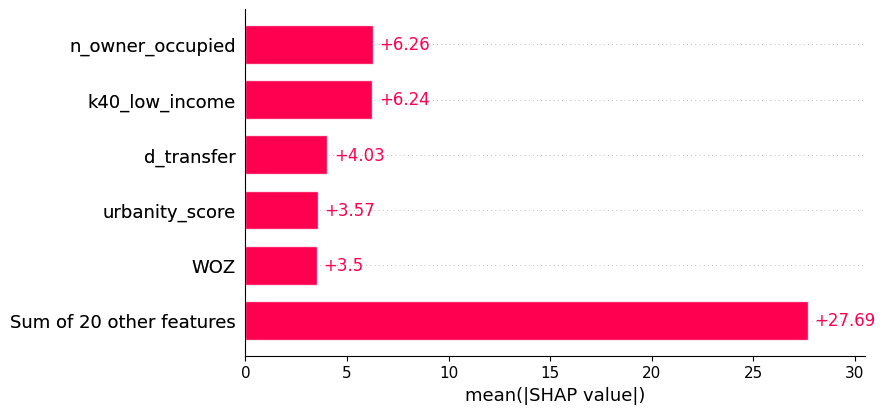

In [14]:
shap.plots.bar(shap_values, max_display=6)

In [15]:
# Force plot of prediction with the highest error
shap.plots.force(shap_values[df.index[0]])

In [16]:
shap.plots.force(shap_values[df.index[1]])

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


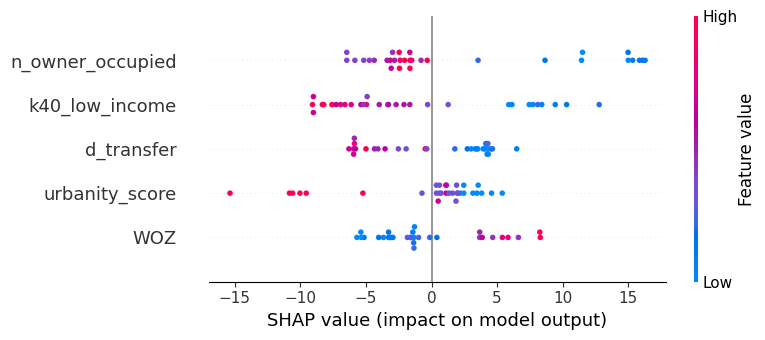

In [17]:
shap.summary_plot(shap_values, X_test, max_display=5)